In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

In [2]:
file = Path("crypto_data.csv")
df = pd.read_csv(file, index_col=[0])
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [3]:
df['IsTrading'].unique()

array([ True, False])

In [4]:
is_trading = df['IsTrading']==True
print(is_trading.head())

42     True
365    True
404    True
611    True
808    True
Name: IsTrading, dtype: bool


In [5]:
df_revised = df[is_trading]
print(df_revised.shape)

(1144, 6)


In [6]:
df_revised.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [7]:
df_clean = df_revised.drop(['IsTrading'], axis='columns')
df_clean

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
df_removenull = df_clean.dropna()
df_removenull

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
mined_data = df_removenull['TotalCoinsMined']!=0
print(mined_data.head())

42       True
404      True
808     False
1337     True
BTC      True
Name: TotalCoinsMined, dtype: bool


In [10]:
df_mined = df_removenull[mined_data]
print(df_mined.shape)

(533, 5)


In [11]:
df_mined.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [12]:
df_noname = df_mined.drop(['CoinName'], axis = 'columns')
df_noname

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [13]:
df_noname['Algorithm'].unique()

array(['Scrypt', 'X13', 'SHA-256', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256', 'PHI1612',
       'Lyra2REv2', 'CryptoNight', 'Shabal256', 'Counterparty',
       'Stanford Folding', 'QuBit', 'M7 POW', 'Lyra2RE', 'QUAIT',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'NIST5', 'Dagger',
       'X11GOST', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14', 'DPoS',
       'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d', 'Cloverhash',
       'Skein', 'Time Travel', 'Keccak', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'C11',
       'SkunkHash', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh', 'Green Protocol',
       'Semux BFT consensus', 'X16R', 'Tribus', 'CryptoNight Heavy',
       'Jump Consistent Hash', 'HMQ1725', 'Cryptonight-GPU', 'ECC 256K1',
       'Blake', 'Exosis', 'SHA3-256', 'Equihash+

In [14]:
df_dummies = pd.get_dummies(data=df_noname, columns=['Algorithm', 'ProofType'])
df_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler
crypto_scaled = StandardScaler().fit_transform(df_dummies)
print(crypto_scaled[0:5])

[[-0.11674788 -0.15286468 -0.0433555  -0.0433555  -0.0433555  -0.06137164
  -0.07523548 -0.0433555  -0.06137164 -0.06137164 -0.0433555  -0.0433555
  -0.19226279 -0.06137164 -0.09731237 -0.0433555  -0.11536024 -0.07523548
  -0.0433555  -0.0433555  -0.15176505 -0.0433555  -0.13105561 -0.0433555
  -0.0433555  -0.08695652 -0.0433555  -0.0433555  -0.0433555  -0.0433555
  -0.06137164 -0.0433555  -0.08695652 -0.08695652 -0.08695652 -0.0433555
  -0.13105561 -0.13827675 -0.13827675 -0.0433555  -0.06137164 -0.0433555
  -0.07523548 -0.1815096  -0.0433555  -0.0433555  -0.0433555  -0.07523548
  -0.15811388 -0.3145935  -0.0433555  -0.08695652 -0.07523548 -0.06137164
  -0.0433555   1.38873015 -0.0433555  -0.0433555  -0.06137164 -0.0433555
  -0.0433555  -0.0433555  -0.0433555  -0.0433555  -0.0433555  -0.0433555
  -0.0433555  -0.39836623 -0.0433555  -0.1815096  -0.0433555  -0.08695652
  -0.08695652 -0.10670145 -0.0433555  -0.0433555  -0.13105561 -0.0433555
  -0.0433555  -0.0433555  -0.0433555  -0.07523

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=3)

crypto_pca = pca.fit_transform(crypto_scaled)

In [18]:
print(crypto_pca)

[[-0.33178215  1.03687501 -0.62682358]
 [-0.31507519  1.03707992 -0.62716764]
 [ 2.31559902  1.66935359 -0.62182657]
 ...
 [ 0.3342249  -2.23754179  0.53042114]
 [-0.17650196 -2.09536815  0.51250998]
 [-0.29413444  0.81192319 -0.33199421]]


In [19]:
crypto_df = pd.DataFrame(data=crypto_pca, columns=['principal component 1', 
                                                   'principal component 2', 
                                                   'principal component 3'],
                        index=df_noname.index)
crypto_df.head()

,principal component 1,principal component 2,principal component 3
42,-0.331782,1.036875,-0.626824
404,-0.315075,1.037080,-0.627168
1337,2.315599,1.669354,-0.621827
BTC,-0.137223,-1.318644,0.205433
ETH,-0.155912,-2.055210,0.428146


In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [21]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(crypto_df)
tsne_features.shape

(533, 2)

In [22]:
crypto_df['x'] = tsne_features[:,0]
crypto_df['y'] = tsne_features[:,1]

<function matplotlib.pyplot.show(close=None, block=None)>

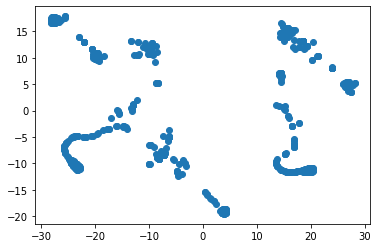

In [23]:
plt.scatter(crypto_df['x'], crypto_df['y'])
plt.show

In [24]:
#Some clusters are identifiable.

In [25]:
from sklearn.cluster import KMeans

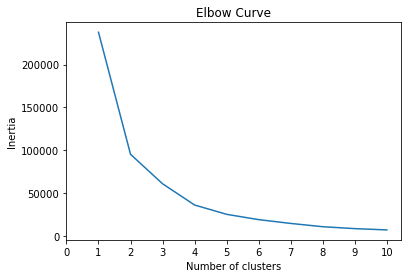

In [26]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_df)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [27]:
#According to the elbow curve, our k value falls approximately at k=4. 

In [28]:
model = KMeans(n_clusters=4, random_state=0)

model.fit(crypto_df)

predictions = model.predict(crypto_df)

crypto_df["cluster"] = model.labels_
crypto_df.head()

,principal component 1,principal component 2,principal component 3,x,y,cluster
42,-0.331782,1.036875,-0.626824,-22.809973,-11.009475,0
404,-0.315075,1.037080,-0.627168,-21.994635,-5.052406,0
1337,2.315599,1.669354,-0.621827,-13.365422,0.502023,0
BTC,-0.137223,-1.318644,0.205433,26.998243,5.360799,2
ETH,-0.155912,-2.055210,0.428146,19.197916,12.241124,2
